*Created by Petteri Nevavuori <<petteri.nevavuori@gmail.com>>*

---

**CHIO & FREEMAN: MACHINE LEARNING & SECURITY (2018)** <br>
*<small>Otsikot kirjan mukaan, muutoin suomeksi.</small>*

<h1>Sisällysluettelo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Production-Systems" data-toc-modified-id="Production-Systems-1">Production Systems</a></span><ul class="toc-item"><li><span><a href="#Defining-Machine-Learning-System-Maturity-and-Scalability" data-toc-modified-id="Defining-Machine-Learning-System-Maturity-and-Scalability-1.1">Defining Machine Learning System Maturity and Scalability</a></span><ul class="toc-item"><li><span><a href="#What's-Important-for-Security-Machine-Learning-Systems?" data-toc-modified-id="What's-Important-for-Security-Machine-Learning-Systems?-1.1.1">What's Important for Security Machine Learning Systems?</a></span></li></ul></li><li><span><a href="#Data-Quality" data-toc-modified-id="Data-Quality-1.2">Data Quality</a></span><ul class="toc-item"><li><span><a href="#Problem:-Bias-in-Datasets" data-toc-modified-id="Problem:-Bias-in-Datasets-1.2.1">Problem: Bias in Datasets</a></span></li><li><span><a href="#Problem:-Label-Inaccuracy" data-toc-modified-id="Problem:-Label-Inaccuracy-1.2.2">Problem: Label Inaccuracy</a></span></li><li><span><a href="#Solutions:-Data-Quality" data-toc-modified-id="Solutions:-Data-Quality-1.2.3">Solutions: Data Quality</a></span></li><li><span><a href="#Problem:-Missing-Data" data-toc-modified-id="Problem:-Missing-Data-1.2.4">Problem: Missing Data</a></span></li><li><span><a href="#Solutions:-Missing-Data" data-toc-modified-id="Solutions:-Missing-Data-1.2.5">Solutions: Missing Data</a></span></li></ul></li><li><span><a href="#Model-Quality" data-toc-modified-id="Model-Quality-1.3">Model Quality</a></span><ul class="toc-item"><li><span><a href="#Problem:-Hyperparameter-Optimization" data-toc-modified-id="Problem:-Hyperparameter-Optimization-1.3.1">Problem: Hyperparameter Optimization</a></span></li><li><span><a href="#Solutions:-Hyperparameter-Optimization" data-toc-modified-id="Solutions:-Hyperparameter-Optimization-1.3.2">Solutions: Hyperparameter Optimization</a></span></li><li><span><a href="#Feature:-Feedback-Loops,-A/B-Testing-of-Models" data-toc-modified-id="Feature:-Feedback-Loops,-A/B-Testing-of-Models-1.3.3">Feature: Feedback Loops, A/B Testing of Models</a></span></li><li><span><a href="#Feature:-Repeatable-and-Explainable-Results" data-toc-modified-id="Feature:-Repeatable-and-Explainable-Results-1.3.4">Feature: Repeatable and Explainable Results</a></span></li></ul></li><li><span><a href="#Performance" data-toc-modified-id="Performance-1.4">Performance</a></span><ul class="toc-item"><li><span><a href="#Goal:-Low-Latency,-High-Scalability" data-toc-modified-id="Goal:-Low-Latency,-High-Scalability-1.4.1">Goal: Low Latency, High Scalability</a></span></li><li><span><a href="#Performance-Optimization" data-toc-modified-id="Performance-Optimization-1.4.2">Performance Optimization</a></span></li></ul></li></ul></li></ul></div>

# Production Systems

Tähän mennessä mallinnusta on lähestytty offline-näkökulmasta, eli eristetyissä laboratoriomaisissa ympäristöissä tapahtuvasti. Kyseessä on suuri harppaus, kun koulutusympäristöstä siirrytään tuotantoympäristöön koneoppimismenetelmien kohdalla. Skaalautuvuus, luotettavuus, tehokkuus ja merkityksellisyys saavat uudet mittasuhteet. Tässä luvussa keskitytään tähän aiheeseen, alkaen tuotantovalmiudesta, käyttöönotettavuudesta ja skaalautuvuudesta.

## Defining Machine Learning System Maturity and Scalability

Abstraktien termien sijasta on hyvä käydä kypsien ja skaalautuvien koneoppimisjärjestelmien piirteitä ensin läpi, mitkä ovat yleisiä sovelluskontekstista riippumatta. Näitä piirteitä ovat:

 - *Datan laatu*: Vääristymätöntä, todennettavaa, järkevästi käsiteltyä
 - *Mallin laatu*: Hyperparametrien optimointi tehokasta, A/B testattuu, ajankohtaiset takaisinkytkennät, toistettavat ja selitettävät tulokset
 - *Suorituskyky*: Alhainen käyttöviive, skaalautuvuus, automatisoitu datan keruu ja käsittely
 - *Ylläpito*: Versioitu, sulava tuotantoonvienti, hallittu heikentyminen, helppo säädettävyys ja viritettävyys, hyvin dokumentoitu
 - *Seuranta*: Järjestelmän tila, suorituskyky ja datan jakaumat seurattavissa hälytyksin
 - *Luotettavuus*: Vakaa vihamielisissä ympäristöissä, data ja yksityisyys suojattua sekä turvattua
 
Luonnollista kuitenkin on, että jokainen näistä piirteistä ei ole yhtä tärkeässä roolissa eri järjestelmissä.

### What's Important for Security Machine Learning Systems?

Ensisijaisen tärkeää on, että turvallisuuskontekstiin kehitetyillä malleilla on äärimmäisen tarkat tarkkuusvaatimukset. Tuhannesosan virhe tarkottaa verkkoliikenteen pakettidatassa pahimmillaan tuhatta väärää tulosta minuutissa. Mikäli automatisoitua väärien negatiivisten tai positiivisten luokittelujen jatkotarkastusprosessia ei ole, on vaaditun ihmistyön määrä liian suuri, jotta järjestelmä tehostaisi mitään. Tärkeimmät edellämainituista piirteistä ovat turvallisuuskontekstissa:

 - Vääristymätön ja todennettava data
 - Mallin tehokas optimointi ja A/B-testattavuus
 - Skaalautuvuus ja tehokas automatisoitu datan keruu
 - Sulava tuotantoonvienti, helppo muokattavuus, dokumentoinnin kattavuus
 - Järjestelmän tilan ja suorituskyvyn seurattavuus
 - Datan yksityisyys suojattu
 
Seuraavaksi käydään näitä piirteitä hieman tarkemmin läpi.

## Data Quality

Kuten jo todettu sekä esimerkein osoitettu, datan laatu määrittelee mallinnuksen onnistumisen.

### Problem: Bias in Datasets

Tasapainoiset datajoukot ovat harvinaisia, mutta epätasapainoisten datajoukkojen käyttö siirtää datassa piilevän vääristymän myös sillä koulutettuun malliin. Ajan ja muidenkin rajoitusten takia kerätyt datajoukot ovat usein jossain määrin vääristyneitä sekä epätäydellisiä mallinnettavaan kokonaiskysymykseen nähden - yhteen datajoukkoon on miltei mahdotonta saada luotettavuuden takaava määrä havaintoja jokaisesta haittaohjelmasta.

Kirjassa esitellään termi populaatio, jolla viitataan kunkin tarkasteltavan asian kaikkiin mahdollisiin ilmentymiin. Koneoppimispuolella tässä kohdin on tavanomaista puhua *piilevästä datantuottoprosessista*, jota pyritään likimääräisesti mallintaamaan käyttämällä prosessiin liittyviä yksittäisiä havaintoja. Koska kaikki mahdollisia populaation ilmentymiä on mahdotonta kerätä datajoukkoon, on tyydyttävä vain rajatun osan koko prosessista tavoittavaan havaintojoukkoon. Tällöin datassa on itsessään elementit valintavääristymille, jolloin datajoukon keruupäätöksillä on jo lähtökohtaisesti rajattu kaikki sen ulkopuoliset havainnot mallinnuksen ulkopuolelle. Muitakin vääristymiä on, kuten havainto-odotus-vääristymä, jossa vain odotuksia vastaavat havainnot kerätään osaksi datajoukkoa.

### Problem: Label Inaccuracy

Väärät havaintojen nimiöinnit vaikeuttava datantuottoprosessia tarkasti kuvaavan mallin kouluttamista. Mikäli datajoukko aina mallin suorituskyvyn mittaamiseen käytettyä validointidatajoukkoa myöten on väärin nimiöity, suoriutuu malli koulutusvaiheessa hyvin mutta heikosti tuotantokäytössä. Vääriä nimiöintejä tulee tyypillisesti esimerkiksi nimiöinnin joukkostamisen (*crowsourcing*) seurauksena. Toisaalta, myös nimiöintien jälkitarkastus vaatii suuria ihmisponnistuksia, vaikka koko joukosta valittaisiin vain satunnaisia havaintoja.

### Solutions: Data Quality

Esiteltyihin ongelmiin on joitakin ratkaisuja. Tärkeintä on ymmärtää, että ongelma on todellinen. Havaintoluokkien epätasapaino on eräs vääristymän ilmentymä, joskin ilmeinen sellainen. Datajoukon keruuvaiheen vääristymiä on vaikeampi havaita, joita voi välttää vain olemalla erityisen huolellinen kerättävän datan ymmärtämisessä, keruun rajoitusten huomioinnissa ja keruun tavoitteiden mielessä pitämisessä. Joskus ongelman huolellinen rajaus auttaa jo sekin. Ihmisvirheitä saadaan vähennettyä, kun nimiöintiin osallistuu monia toisistaan riippumattomia henkilöitä. Tällöin havaintokohtainen konsensus on eräs ilmentymä onnistuneesta nimiöinnistä.

Mallinnuksella voidaan myös vähintää datassa ilmenevän kohinan vaikutusta. Tällöin on käytettä vahvempaa regularisointia, jolloin malli pakotetaan oppimaan laaja-alaisemmin havaintoihin päteviä piirteitä vähentäen kohinan vaikutusta.

### Problem: Missing Data

Puutteellinen data on yksi yleisempiä datan laadun ongelmia. Puutteet voivat johtua monista tekijöistä, kuten keruuprosessin tai lähtökohtaisten suunnittelupäätösten johdosta. Keskiössä on tällöin tapa, jolla puuttuvat arvot käsitellään ja esimerkiksi algoritmien välillä on eroja puuttuvien arvojen käsittelytavoissa. Puuttuvien arvojen korvaaminen ihmiselle ilmeisillä 0-arvoilla tai vastaavilla ei kuitenkaan välttämättä edesauta mallinnusta, joskin haitallinen vaikutus riippuu käytetystä algoritmista.

### Solutions: Missing Data

Esitellään puuttuvan datan ongelman ratkaisua esimerkillä, jossa käydään läpi puuttuvia arvoja sisältävää työntekijädataa. Aloitetaan lataamalla data.

In [43]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/employee_attrition_missing.csv')
df.head()

,TotalWorkingYears,MonthlyIncome,Overtime,DailyRate,Label
0,NaN,6725,0,498.0,0
1,12.0,2782,0,NaN,0
2,9.0,2468,0,NaN,0
3,8.0,5003,0,549.0,0
4,12.0,8578,0,NaN,0


Kuten huomata voi, puuttuu datajoukosta arvoja sieltä täältä. Katsotaanpa, mitä käy, kun tällaista dataa syötetään mallille.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Label', axis=1), df.Label,
    test_size=0.3, random_state=0)

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Virhehän sen kertoo. Eli käytetty menetelmä (puumalli) ei osaa käsitellä ei-numeerisia, puuttuvia arvoja. Puuttuvia arvoja voidaan käsitellä viidellä tapaa:

- Puuttuvia arvoja sisältävät rivit tiputetaan pois.
- Puuttuvia arvoja sisältävät sarakkeet tiputetaan pois.
- Puuttuvat aukot täytetään datan lisäkeruulla.
- Puuttuvat arvot korvataan tätä ilmaisevalla arvolla (0, -1, jne.)
- Korvaamalla puuttuvat arvot datapohjaisin keinoin (*imputation*)

Mikäli jotkin rivit tai sarakkeet ovat hyvin puutteellisia, on niiden pudottaminen perusteltua. Tällöin käytettävissä ei ole riittävää määrää kontekstitietoa arvojen korvaamiseen millään järkevällä tavalla. Datan keruu on onnistuessaan ja resurssien niin salliessa hyvä keino, sillä silloin puuttuvat arvot korvataan lähtökohtaisen datantuottoprosessin tuotteilla. Ilmaisinarvolla korvaus käsiteltiinkin jo. Kaikkein mielenkiintoisin menetelmistä on viimeinen, korvaus dataan pohjaten. Keskitytäänpä seuraavaksi siihen.

Data-pohjaisella korvaamisella pyritään puuttuvat arvot korvaamaan siten, että esimerkiksi sarakekohtaiset jakaumat ei juuri muuttuisi. Tavoite on, ettei korvaus muuttaisi datan rakennetta. Toisin sanoen puuttuvat arvot korvataan joko keskiarvolla, mediaanilla tai moodilla, tilanteesta riippuen. 

Kokeillaanpa siis sitä seuraavaksi. Aloitetaan tutkimalla sarakekohtaiset tunnusluvut.

In [45]:
print(f'Dataset size: {df.shape[0]}')
df.describe()

Dataset size: 1470


,TotalWorkingYears,MonthlyIncome,Overtime,DailyRate,Label
count,1048.000000,1470.000000,1470.000000,894.000000,1470.000000
mean,11.135496,6502.931293,0.282993,804.225951,0.161224
std,7.706084,4707.956783,0.450606,403.289867,0.367863
min,0.000000,1009.000000,0.000000,103.000000,0.000000
25%,6.000000,2911.000000,0.000000,469.000000,0.000000
50%,10.000000,4919.000000,0.000000,800.000000,0.000000
75%,15.000000,8379.000000,1.000000,1179.000000,0.000000
max,40.000000,19999.000000,1.000000,1499.000000,1.000000


Dataa puuttuu sarakkeista `TotalWorkingYears` ja `DailyRate`. Tutkitaanpa vielä niiden sarakkeiden tunnuslukuja.

TotalWorkingYears
  Mean: 11.135496183206106
  Median: 10.0
  Mode(s): 10.0


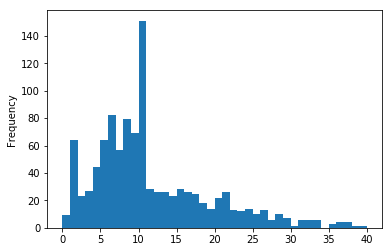

DailyRate
  Mean: 804.2259507829978
  Median: 800.0
  Mode(s): 530.0, 688.0, 1082.0


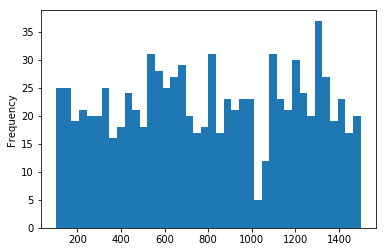

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
print('TotalWorkingYears')
print(f'  Mean: {df.TotalWorkingYears.mean()}')
print(f'  Median: {df.TotalWorkingYears.median()}')
print(f'  Mode(s): {", ".join([str(m) for m in df.TotalWorkingYears.mode()])}')
df.TotalWorkingYears.plot(kind='hist',bins=40)
plt.show()
      
print('DailyRate')
print(f'  Mean: {df.DailyRate.mean()}')
print(f'  Median: {df.DailyRate.median()}')
print(f'  Mode(s): {", ".join([str(m) for m in df.DailyRate.mode()])}')
df.DailyRate.plot(kind='hist',bins=40)
plt.show()

Sarakkeelle `TotalWorkingYears` on käytettävä mediaania, mutta `DailyRate`-sarakkeelle riittää keskiarvo.

In [47]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')

df.DailyRate = imputer_mean.fit_transform(df[['DailyRate']])
df.TotalWorkingYears = imputer_median.fit_transform(df[['TotalWorkingYears']])

df.head()

,TotalWorkingYears,MonthlyIncome,Overtime,DailyRate,Label
0,10.0,6725,0,498.000000,0
1,12.0,2782,0,804.225951,0
2,9.0,2468,0,804.225951,0
3,8.0,5003,0,549.000000,0
4,12.0,8578,0,804.225951,0


In [49]:
df.describe()

,TotalWorkingYears,MonthlyIncome,Overtime,DailyRate,Label
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,10.809524,6502.931293,0.282993,804.225951,0.161224
std,6.525995,4707.956783,0.450606,314.435912,0.367863
min,0.000000,1009.000000,0.000000,103.000000,0.000000
25%,7.000000,2911.000000,0.000000,670.000000,0.000000
50%,10.000000,4919.000000,0.000000,804.225951,0.000000
75%,11.000000,8379.000000,1.000000,922.000000,0.000000
max,40.000000,19999.000000,1.000000,1499.000000,1.000000


Kuten odottaa saattaa, on keskiarvo vuosien kohdalla hieman muuttunut, mutta toisen sarakkeen kohdalla jäänyt muuttumattomaksi. Koitetaanpa mallinnusta uudestaan.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Label', axis=1), df.Label,
    test_size=0.3, random_state=0)

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7392290249433107

## Model Quality

Koulutetut mallit ovat koneoppimismallien kovaa ydintä, jotka vaativat siksi laadullista ja toiminnallista tarkkailua. Etenkin kyberturvallisuuskontekstissa näihin asioihin on kiinnitettävä huomiota koulutuksen ja tuotantoonviennin jälkeenkin, jotta malli on varmasti ajantasainen ja haluttuun suorituskykyyn ulottuva. Mallin on oltava myös luotettava vihamielisestä ympäristöstään huolimatta.

### Problem: Hyperparameter Optimization

Hyperparametrit ovat varsinaisiin algoritmin parametrien (esim. neuroverkon painot) optimointiin ja oppimiseen vaikuttavia arvoja. Niitä ei siis opita, vaan ne säätelevät oppimista. Näitä ovat esimerkiksi oppimiskerroin, regularisointikerroin, puumallin syvyys jne. Niitä on monia ja ne vaihtelevat mallin, optimointialgoritmin ja valittujen regularisointimenetelmien mukaan. Ne on määritettävä usein yrityksen ja erehdyksen kautta ja niiden keskinäiset suhteet selviävät, mikäli selviävät, samalla tavoin. Mitä enemmän säädettäviä hyperparametreja löytyy, sitä useampi koulutus on tehtävä parhaimman mallin tuottavien hyperparametrien määrittämiseksi. Muutokset datassa tai mallin rakenteessa voivat vaikuttaa merkittävästikin aiemmin sopineiden hyperparametrien validiuteen.

### Solutions: Hyperparameter Optimization

Mikäli säädettäviä hyperparametreja on vähän, voidaan optimaalisin hyperparamertien joukko valitaa raa'an voiman avulla koittamalla soveliaita arvoja kaikilla soveliailla arvojen sekoituksilla. Yleisempi tapa on kuitenkin käyttää erilaisia tekniikoita eri hyperparametrien arvojen tehokkaaseen läpikäyntiin parhaiten suorituvan mallin tuottavan hyperparametrijoukon löytämiseksi.

Eniten käytetyt hyperparametrien viritykseen käytetyt menetelmät of taulukkomainen hila- tai taulukkoetsintä (*grid search*) ja hyperparametrejä jakaumista satunnaisesti nostava satunnaisetsintä (*random search*). 

Ensimmäinen menetelmistä, taulukkoetsintä, toimii, kunhan hyperparametrien määrä on vähäinen. Jos esimerkiksi hyperparametreja on vain kolme, ja kullekin etsitään parasta vaihtoehtoa kolmen arvon joukosta, on malli koulutettava $3^3=27$ kertaa jokaisen arvojoukon kokeilemiseksi. Kuten edellisestä voi nopeasti huomata, kasvaa etsintään vaadittujen koulutusten määrä eksponentiaalisesti sekä hyperparametrien että niiden kohdalla kokeiltavien arvojen kohdalla. 

Toinen menetelmistä, satunnaisetsintä, toimii lähtökohtaisesti paremmin, kun tarvittavien koulutusten määrä räjähtäisi taulukkokoulutuksella käsiin. Tällöin kullekin hyperparametrille määritellään todennäköisyysjakauma, josta kullekin uudelle koulutukselle nostetaan uusi satunnainen arvo, hyperparametrikohtaisesti. Näin toimittaessa yrityksen ja erehdyksen menetelmä muuntuu lähemmäs tilastotieteellistä lähestymistä, jolla voidaan usein päästä myös parempaan tarkkuuteen hyperparametrien optimaalisimpien arvojen valinnassa.

### Feature: Feedback Loops, A/B Testing of Models

Koska kyberturvallisuuden kohdalla käytettyjen mallien tarkkuus on lähes kaikki kaikessa, on järjestelmistä oltava riittävät takaisinkytkennät mallin toiminnan korjaamiseen ja kehittämiseen. Staattisten mallien kohtalona on ajan myötä heiketä, sillä datalla on taipumus elää ajan myötä. Siksi mukautumiskyky muuttuviin olosuhteisiin on tärkeä elementti mallin elinkaaren pidentämisessä. Yksinkertaisimmillaan toimiva takaisinkytkentä on mallin säätäminen jokaisen tutkitun väärin luokitellun havainnon kohdalla, jolla pyritään varmistumaan samankaltaisen virheen toistumattomuudesta tulevaisuudessa. 

Edellämainittuun liittyy vahvasti kaksi koneoppimisen osa-aluetta, vahvistusoppiminen (*reinforcement learning*) ja aktiivinen oppiminen. Ensimmäinen liittyy oppimiseen palkitsemisen kautta ja siinä pääpaino on tuntemattoman tutkimisen ja tunnetun hyväksikäyttämisen tasapainottamisessa. Toinen on taas osittain ohjatun oppimisen erikoistapaus, jossa kaikista epävarmimmissa ennusteissa mallia autetaan eteenpäin ihmisvoimin.

A/B-testaus on puolestaan satunnaistettu testaustapa järjestelmän osien kokonaisvaikutuksen ymmärtämiseksi. A/B-testejä käytetään etenkin verkkosivuilla monitavoitteiseen optimointiin. Menetelmässä populaatio jaetaan satunnaisesti kahteen osiin ja osat näkevät eri versiot testattavasta järjestelmästä ja mittaamalla vaikutusten eroja sekä erojen tilastollista merkitsevyyttä. A-ryhmä näkee tavallisesti uuden version, kun taas B-ryhmä toimii kontrollina ja testauksen haasteena onkin tasapainoilla luotettavan uutta järjestelmää kuvaavan datamassan tuottamisen ja saavutetun suorituskyvyn ylläpitämisen välillä. Uudet mallit on hyvä testata aina näin, sillä pelkkä mallien jatkuva oppiminen ei takaa edes pysyvää suorituskykyä. Vihamielisissä ympäristöissä on kuitenkin oltava erityisen tarkka, sillä A/B-testauksen lähtökohtaoletuksena on muuttumaton datantuottoprosessi, minkä varjolla testiryhmien erot voidaan sälyttää versioeroille. Tämä ongelma palaa datan tasapainottamiseen ja luotettavaan dataan.

### Feature: Repeatable and Explainable Results

Oikean vastauksen saaminen tai hyvä suorituskyky kerran ei riitä, vaan tärkeintä on toistettavuus ja toistettava prosessi. Esimerkiksi luokittelun tulisi olla johdonmukaista ja ennustettavaa. Pelkän luokittelutarkkuuden tuijottaminen ei takaa sitä, että menetelmä otetaan käyttöön ja hyväksytään. Ihmisen on kyettävä ymmärtämään mallin toimintaa riittävästi, jotta hän kykenee luottamaan mallin tekemiin päätöksiin. Samoin menetelmien kehittäjät kykenevät korjaamaan ja jatkokehittämään mallia paremmin, kun ymmärrys mallin päätösperusteista on edes jokseenkin selkeä.

Koneoppimisessa toistettavuus liittyy olennaisesti ajassa muuttuvien mallien toiminnan toisintamiseen. Havaintokohtaisten luokittelutulosten muuttuessa on erityisen hyödyllistä kyetä vertaamaan aiempaa ja uusinta mallin versiota siten, että tulokset vastaavat kunkin version todellista toimintaa omana toiminta-aikanaan. Tämä mahdollistetaan esimerkiksi tallennuspistein, jotka ikäänkuin versioivat tuotantokäytössä olevaa mallia automaattisesti.

Selitettävyys on konseptina hankalampi, sillä sen aste on hyvin algoritmiriippuvaista. Jo itse kysymys on hankalammin määriteltävä: Mitä tarkoittaa selitettävä malli? Erään määritelmän mukaan selitettävän mallin tulokset on soveliain työkaluin selitettävissä auki siten, että mallia käyttävät ihmiset ymmärtävät mallin päätösten perusteet, kykenevät luottamaan mallin päätöksiin ja myös täten hallitsemaan mallia ymmärryksellä. Selitettävä malli tarjoaa siis riittävästi tietoa syy-seuraus-suhteiden määrittämiseksi. Tätä varten on kuitenkin kehitetty jo erinäisiä menetelmiä. Yksi tällainen on paikallisten tulkittavien malli-agnostisten selityksien (*local interpretable model-agnostic explanations, LIME*) menetelmä, joka syöttää mallille muunneltuja syötteitä ja pyrkii syötteiden ja mallin muutosten perusteella arvioimaan mallin päätösperusteita.

## Performance

Monet tietoturvajärjestelmät sijaitsevat usein ruuhkaisissa järjestelmän osissa. Niiden on oltava siksi suorituskykyisiä ja vaatimiensa resurssien näkökulmasta tehokkaita käyttää. Jopa millisekunnin viive voi kaataa koko järjestelmän. Toisaalta niiden on kyettävä toimimaan myös äärimmäisen rasituksen alla.

### Goal: Low Latency, High Scalability

Koneoppiminen on laskennallisesti raskasta. Tehokkaimpien mallien kohdalla niiden käyttö varsinaisessa palvelun dataputkessa voi kuitenkin aiheuttaa niin merkittävän viiveen, että palvelun käyttäjät alkavat kokea sen negatiivisena. Asynkroniset päätöksentekoprosessit auttavat tässä, jossa malleja ajetaan palvelun rinnalla muodostamatta kuitenkaan viivettä lisäävää pullonkaulaa. Näin toimittaessa on kuitenkin aina punnittava riskit - läpipäässyt, joskin jälkikäteen oikein luokiteltu haittavaikutus, voi kyetä aiheuttamaan mittavia vahinkoja.

### Performance Optimization

Kuten ohjelmistokehityksessä, myös koneoppimisessa voidaan jossain määrin tarkastella mallin kokonaissuorituskykyä ositellusti ja jaotellusti. Keinoja ovat muun muassa:

 - *Profilointi ja optimointi*: Instrumentoimalla mallin toimintaa aina datan muunnoksista itse mallin sisäisiin datan käsittelyn prosesseihin voidaan löytää merkittäviä pullonkauloja, joiden poistaminen nopeuttaa menetelmän toimintaa huomattavasti. Instrumentointi tehdään tavallisesti profilointisovelluksella. 
 
 - *Algoritmin optimointi*: Joskus algoritmia muokkaamalla tai sen vaihtamisella voidaan myös saavuttaa haluttu suorituskykyloikka jopa ilman, että mallin tarkkuus alenee merkittävästi.
 
Käytännön keinoja mallin nopeuttamiseksi on mm. piirreavaruuden kaventaminen vähemmän merkitsevien piirteiden poistamisella, puumallien käyttö, linearimallien käyttö, datan niin salliessa myös tukivektorikoneiden käyttö, rinnakkaisajetut neuroverkot ja likimääräiset k-syvyiset puut.

### Horizontal Scaling with Distributed Computing Frameworks

Kuten juuri mainittiinkin, on rinnakkaistus (*parallelization*) tehokas tapa lisätä käytetyn mallin suorituskykyä. Vaikkakaan kaikkia malleja ja datajoukkoja ei niin vain voida suoraan hajauttaa osiin, 